In [49]:
from matplotlib import pyplot, cm
from math import * 
import numpy
#import sympy
#from scipy.optimize import brentq
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# 1D Stefan Problem

In [50]:
l = 0.001
nx = 100
dx = l/nx
t = numpy.linspace(0,0.1,20)
dt = 0.5 * dx
alphaw = 0.17*10**-6
alphav = 2.06*10**-5
Cp = 2030
Tw = 383.15
Tsat = 373.15
L = 2.26*10**6
t

array([ 0.        ,  0.00526316,  0.01052632,  0.01578947,  0.02105263,
        0.02631579,  0.03157895,  0.03684211,  0.04210526,  0.04736842,
        0.05263158,  0.05789474,  0.06315789,  0.06842105,  0.07368421,
        0.07894737,  0.08421053,  0.08947368,  0.09473684,  0.1       ])

In [51]:
(Cp*(Tw-Tsat))/(numpy.sqrt(numpy.pi)*L)

0.0050677205955838292

#Transcedental Equation
#from sympy import init_printing
#init_printing ()

In [52]:
#chi = sympy.symbols('chi')
#chi = (Cp*(Tw-Tsat))/(numpy.sqrt(numpy.pi)*L)*(sympy.erf(chi)*sympy.exp(chi**2))
#chi

In [59]:
chi = numpy.linspace(0,0.0664,20)

#interface position theoritically
X = 2*chi*(numpy.sqrt(alphav*t))
X


array([  0.00000000e+00,   2.30144862e-06,   6.50947970e-06,
         1.19586778e-05,   1.84115890e-05,   2.57309778e-05,
         3.38242487e-05,   4.26234249e-05,   5.20758376e-05,
         6.21391128e-05,   7.27781956e-05,   8.39634570e-05,
         9.56694226e-05,   1.07873883e-04,   1.20557251e-04,
         1.33702083e-04,   1.47292712e-04,   1.61314968e-04,
         1.75755952e-04,   1.90603857e-04])

In [58]:
#Temperature distribution theoritically
T = Tw +((Tsat-Tw)/math.erf(chi))*math.erf(chi/2*(numpy.sqrt(alphav*t)))
T

TypeError: only length-1 arrays can be converted to Python scalars

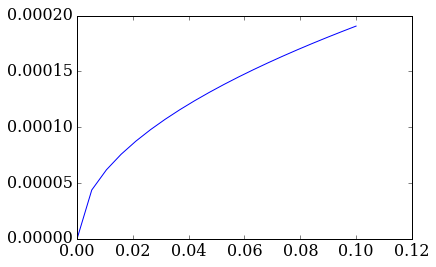

In [57]:
pyplot.plot(t,X)

In [ ]:
#initial conditions
x = numpy.linspace(-10,10,nx)
#X = numpy.ones(x)
#Xi = x*dt #interface moving w.r.t time

#Theoritical Interface motion 


XT = (Cp * (Tw - Tsat))/(numpy.sqrt(numpy.pi)*L)

XI = 2 * XT*(numpy.sqrt(alphav*t))
XI

# Theoritical Temperature Distribution
Td = Tw + ((Tsat-T)/XT)*(XT/XI)

In [ ]:
T = numpy.ones(nx)
Tn = numpy.ones(nx)
for i in range(nx):
    Tn = T.copy()
    if Xi < 0:
        T[1:-1] = Tn[1:-1] + alphaw*dt/dx**2*(Tn[2:]-2*Tn[1:-1]+Tn[0:-2])
    else:
        T[1:-1] = Tn[1:-1] + alphav*dt/dx**2*(Tn[2:]-2*Tn[1:-1]+Tn[0:-2])
        
print(T)